# Case Descriptions

## ROCOF based methods with remote ROCOF sensing

### 0.4 pu load ramping on Bus 12 in Area 1

 - _Case 1_: No inertia emulation at all
 - _Case 2_: Power Sharing between areas (VSC 1 and 2 local inertia emulation enabled, VSC 2 dc droop enabled)
 - _Case 3_: WTG inertia response (VSC 1 inertia emulation, WTGs IE enabled)
 - _Case 4_: Area power sharing with WTG inertial response (VSC 1 and 2 inertia emulation enabled. Observe inadequate responses from WTGs)
 - _Case 5_: Adequate inertial response from WTGs (additional frequency information from grid areas)

Load Ramping in Area 1

   

In [66]:
%matplotlib inline

import os

from matplotlib import pyplot

from andes.plot import main as andesplot
from andes.plot import read_dat, read_label, do_plot, add_plot

import seaborn as sns

from cycler import cycler

import numpy as np

sns.set()

In [67]:
def aio_plot(datfile, lstfile, x_idx, y_idx, ylabel=None,
             legend=None, ytimes=1, savefig=None, xlim=None, **kwargs):
    xl, xv, yl, yv = list(), list(), list(), list()
    
    for i in range(len(datfile)):
        dat = datfile[i]
        lst = lstfile[i]
        tmp1, tmp2 = read_dat(datfile[i], x_idx, y_idx)
        xv.append(tmp1)
        yv.append(tmp2)
        
        tmp1, tmp2 = read_label(lstfile[i], x_idx, y_idx)
        xl.append(tmp1)
        yl.append(tmp2)
    
    for i in range(len(yv)):
        for j in range(len(yv[i])):
            for k in range(len(yv[i][j])):
                yv[i][j][k] = yv[i][j][k] * ytimes
    
    fig, ax = do_plot(xv[0], yv[0], xl[0], yl[0], grid=True, noshow=True)

    linestyle = ['-', '--', ':', '-.'] * len(y_idx)
    
    for i in range(1, len(datfile)):
        add_plot(xv[i], yv[i], xl[i], yl[i],
                 fig, ax, linestyle=linestyle[i], LATEX=True)
    
    if ylabel:
        ax.set_ylabel(ylabel)
    
    if legend:
        ax.legend(legend)
    
    if xlim:
        ax.set_xlim(xlim)
    
    if savefig:
        pyplot.savefig(savefig)
    
    return fig, ax


def multi_case_plot(y_idx, ylabel, savefig=None, **kwargs):
    datfile = ['case1_out.dat',
           'case2_out.dat',
           'case3_out.dat',
           'case4_out.dat',
          ]
    lstfile = ['case1_out.lst',
           'case2_out.lst',
           'case3_out.lst',
           'case4_out.lst',
          ]
    legend = ['Base Case',
          'Inter-Area Inertia Response',
          'WTG Inertia Response',
          'Inter-Area + WTG Inertia Response']
    x_idx = [0]

    fig, ax = aio_plot(datfile, lstfile, x_idx=x_idx, y_idx=y_idx, legend=legend,
                       ylabel=ylabel, savefig=savefig, **kwargs
                       )
    return fig, ax

In [82]:
!mkdir -p pdf

(<matplotlib.figure.Figure at 0x7fe121023320>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe120ba3ba8>)

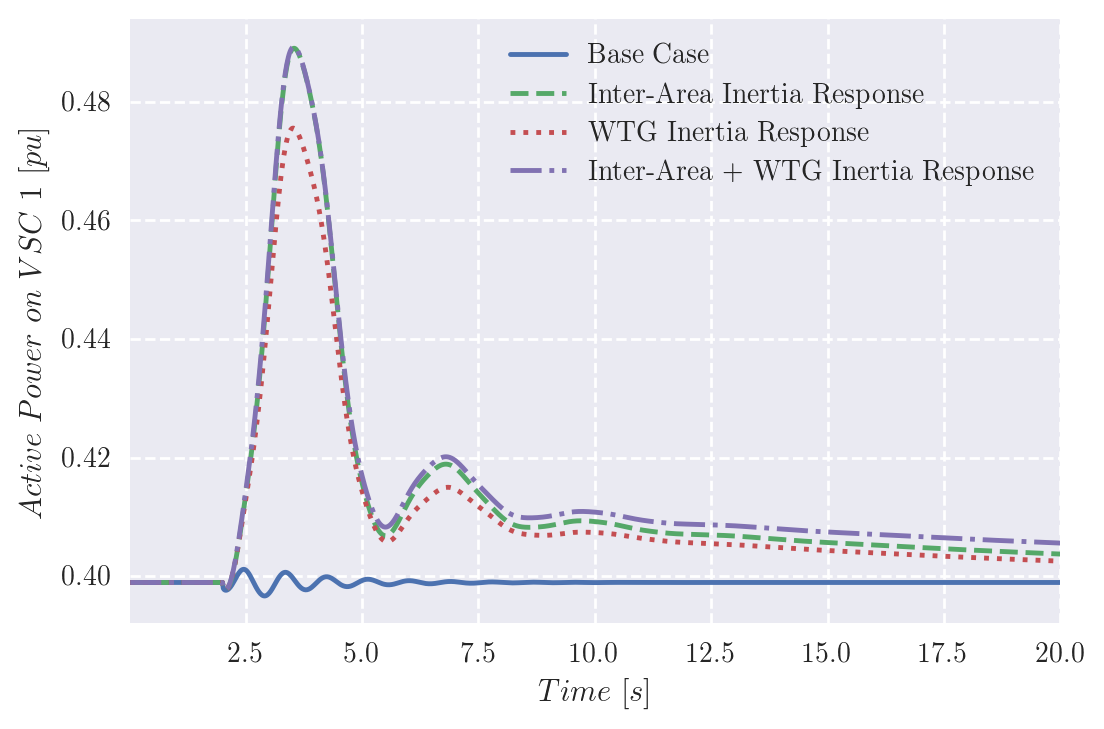

In [68]:
p_VSC1 = [505]

multi_case_plot(p_VSC1,
                ylabel='$Active\ Power\ on\ VSC\ 1\ [pu]$',
                savefig='pdf/area1_p_vsc1.pdf')

(<matplotlib.figure.Figure at 0x7fe120e59a58>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe120a14438>)

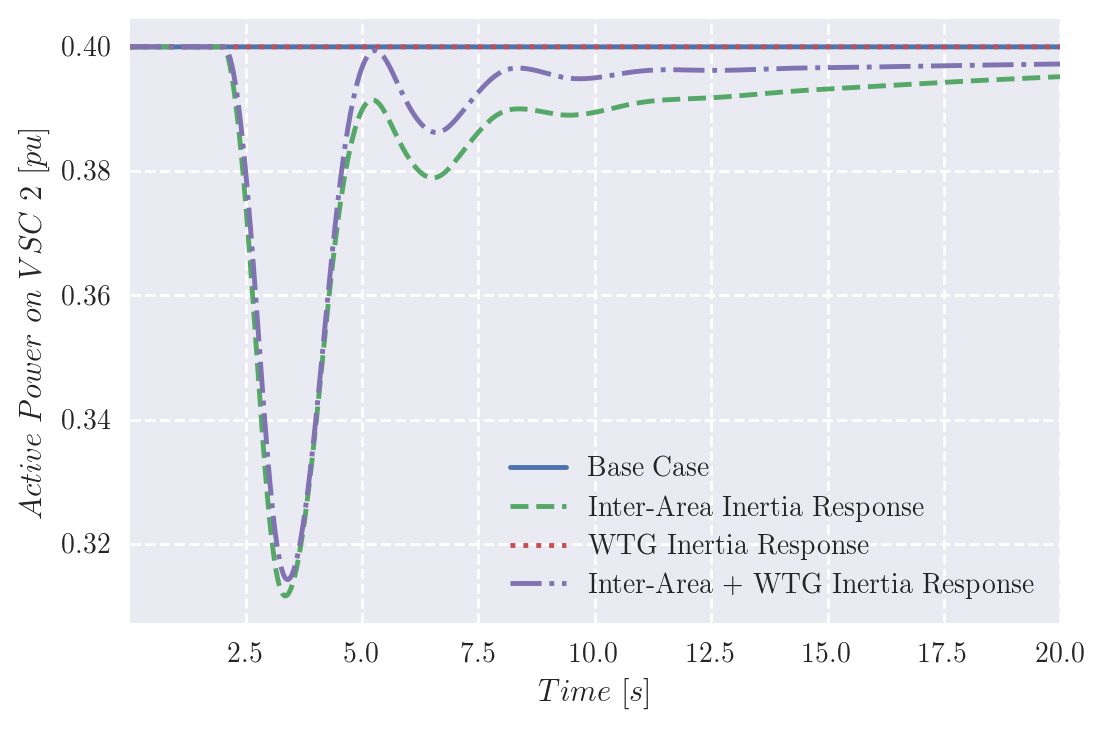

In [69]:
p_VSC2 = [515]
multi_case_plot(p_VSC2,
                ylabel='$Active\ Power\ on\ VSC\ 2\ [pu]$',
                savefig='pdf/area1_p_vsc2.pdf')

(<matplotlib.figure.Figure at 0x7fe120c39dd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe120a14cf8>)

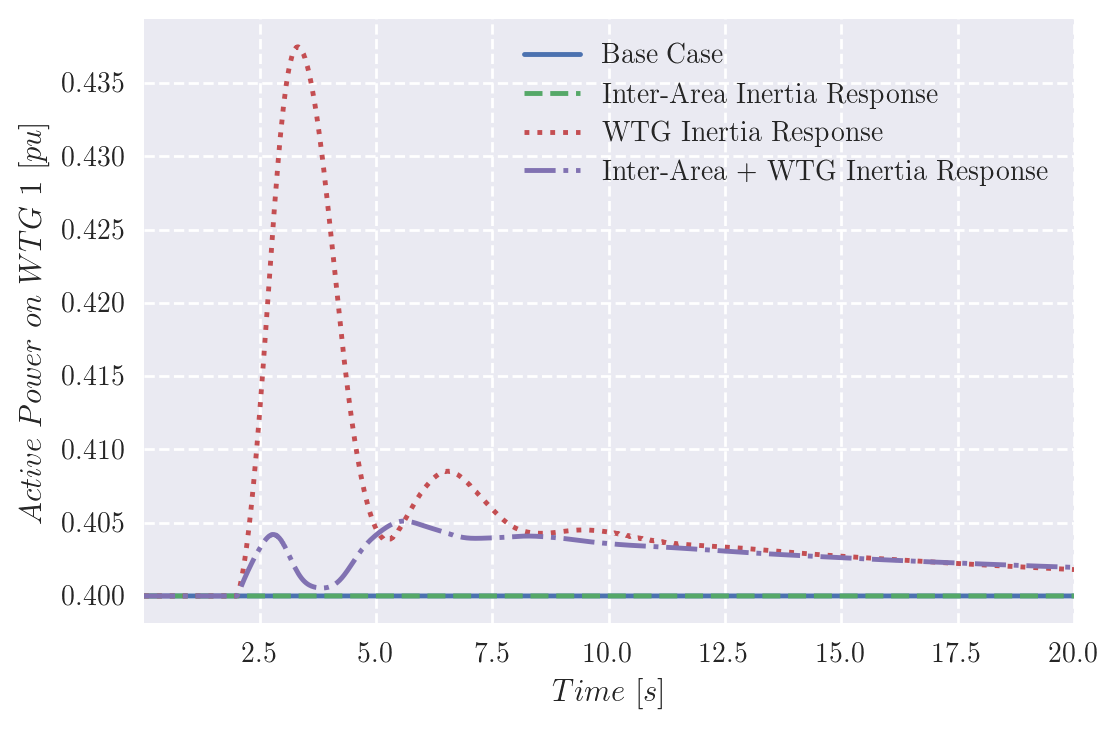

In [70]:
p_WIND1 = [484]
multi_case_plot(p_WIND1,
                   ylabel='$Active\ Power\ on\ WTG\ 1\ [pu]$',
                   savefig='pdf/area1_p_wind1.pdf')

(<matplotlib.figure.Figure at 0x7fe1208966d8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe1206c6438>)

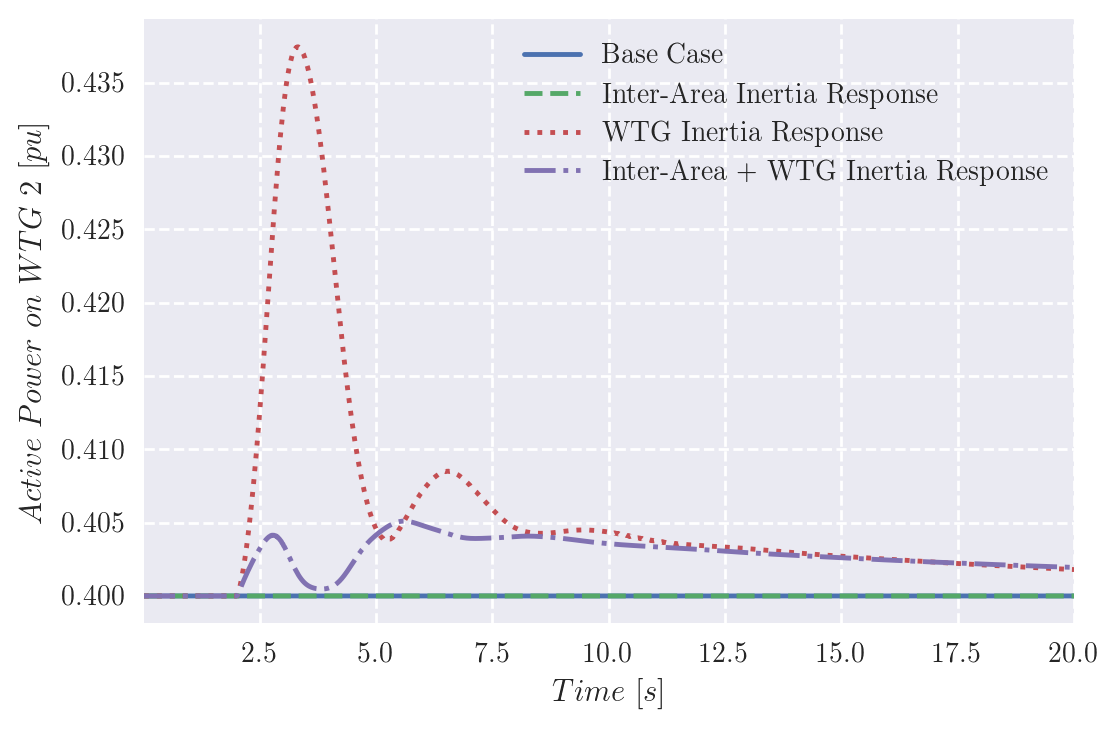

In [71]:
p_WIND2 = [494]
multi_case_plot(p_WIND2,
                ylabel='$Active\ Power\ on\ WTG\ 2\ [pu]$',
                savefig='pdf/area1_p_wind2.pdf')

(<matplotlib.figure.Figure at 0x7fe120798e48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe120542240>)

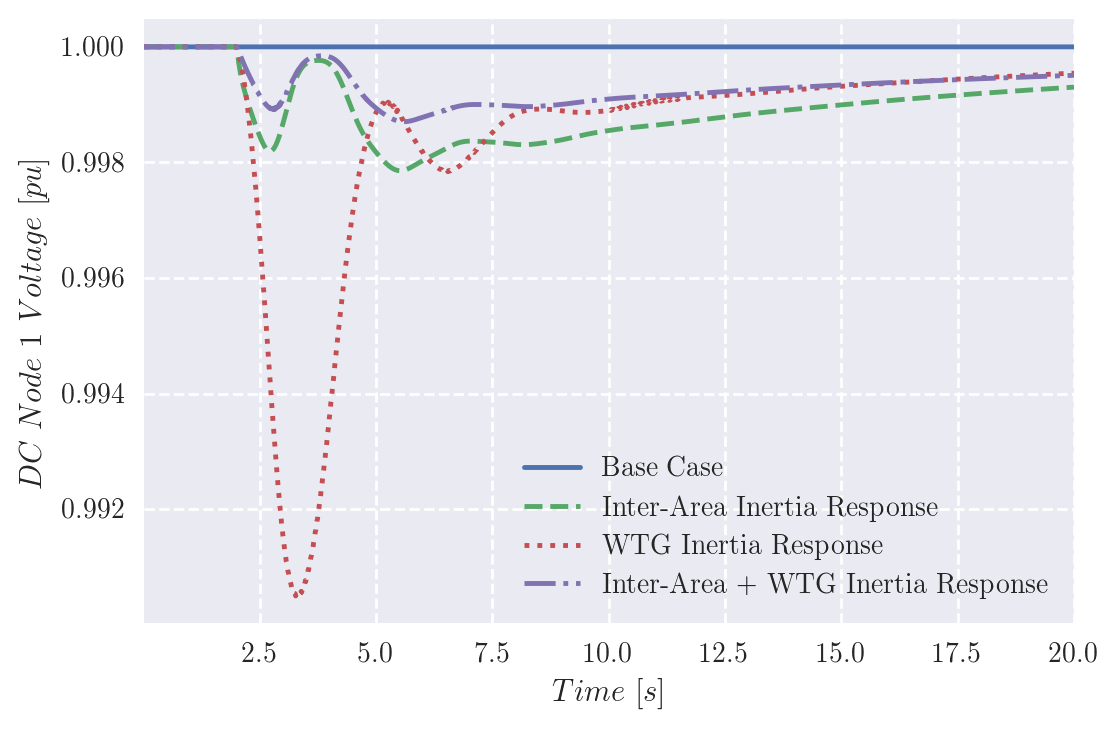

In [72]:
Vdc1 = [289]
multi_case_plot(Vdc1,
                   ylabel='$DC\ Node\ 1\ Voltage\ [pu]$',
                   savefig='pdf/area1_Vdc1.pdf')

(<matplotlib.figure.Figure at 0x7fe120aa9278>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe120372198>)

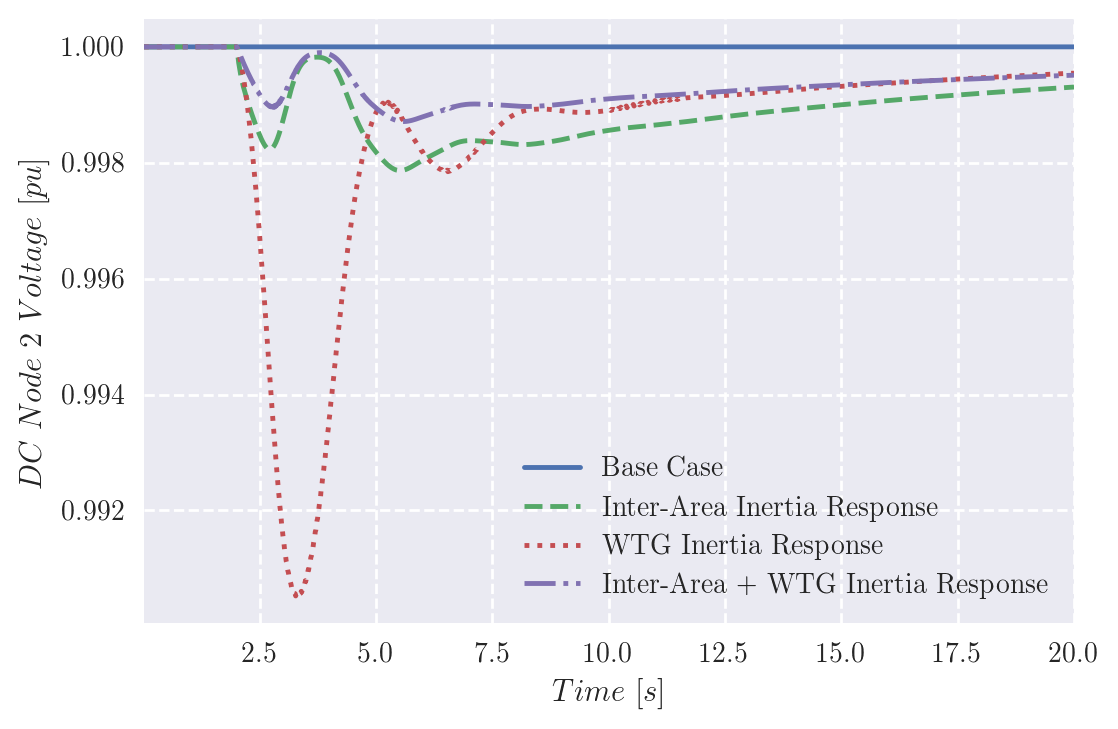

In [73]:
Vdc2 = [290]
multi_case_plot(Vdc2,
                   ylabel='$DC\ Node\ 2\ Voltage\ [pu]$',
                   savefig='pdf/area1_Vdc2.pdf')

(<matplotlib.figure.Figure at 0x7fe120615ac8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe1204957f0>)

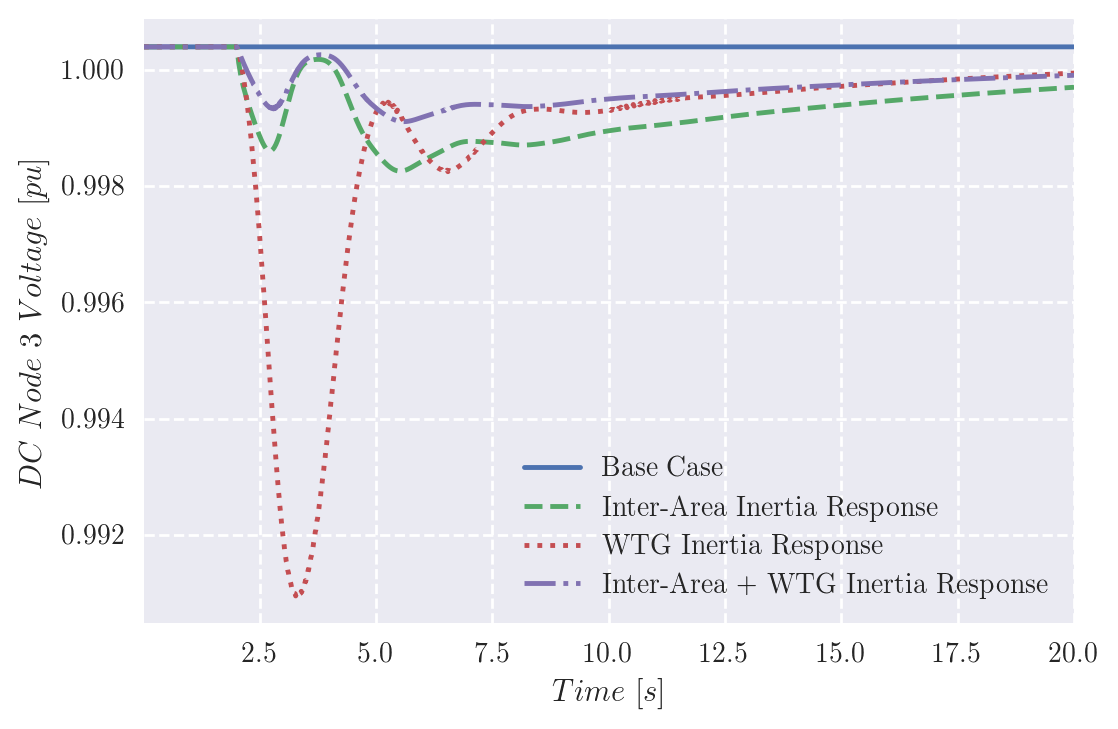

In [74]:
Vdc3 = [291]
multi_case_plot(Vdc3,
                ylabel='$DC\ Node\ 3\ Voltage\ [pu]$',
                savefig='pdf/area1_Vdc3.pdf')

(<matplotlib.figure.Figure at 0x7fe120192828>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe1202e7fd0>)

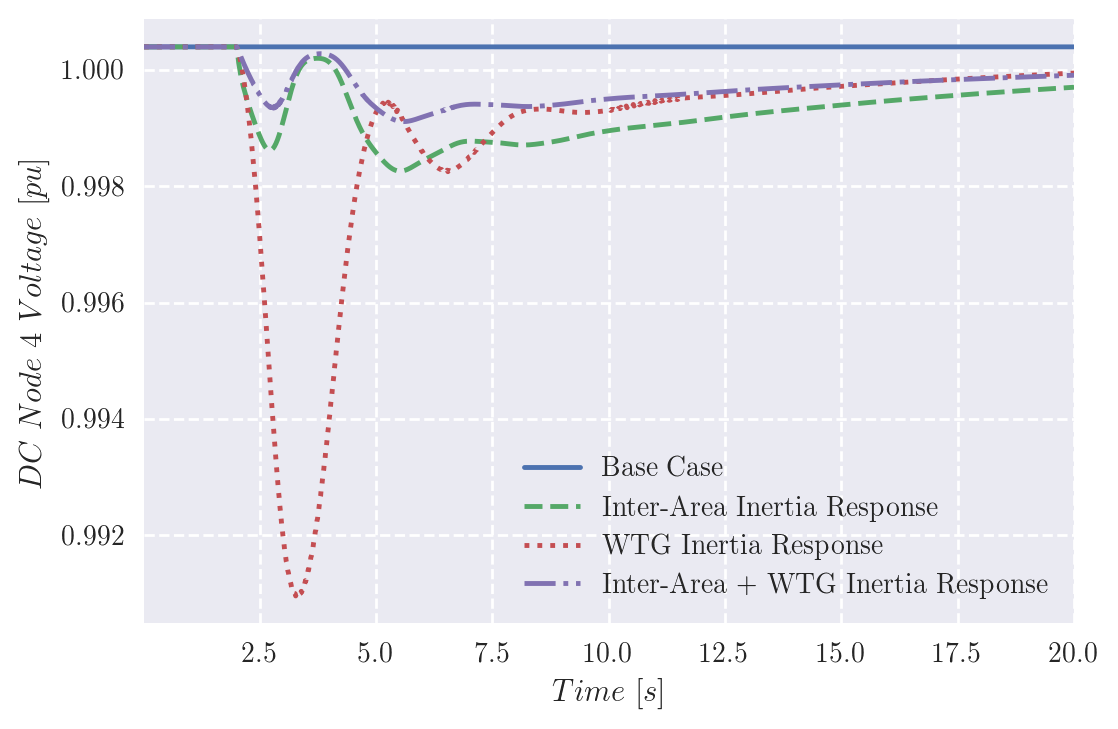

In [75]:
Vdc4 = [292]
multi_case_plot(Vdc4,
                ylabel='$DC\ Node\ 4\ Voltage\ [pu]$',
                savefig='pdf/area1_Vdc4.pdf')

(<matplotlib.figure.Figure at 0x7fe12045c7f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe12d9e45c0>)

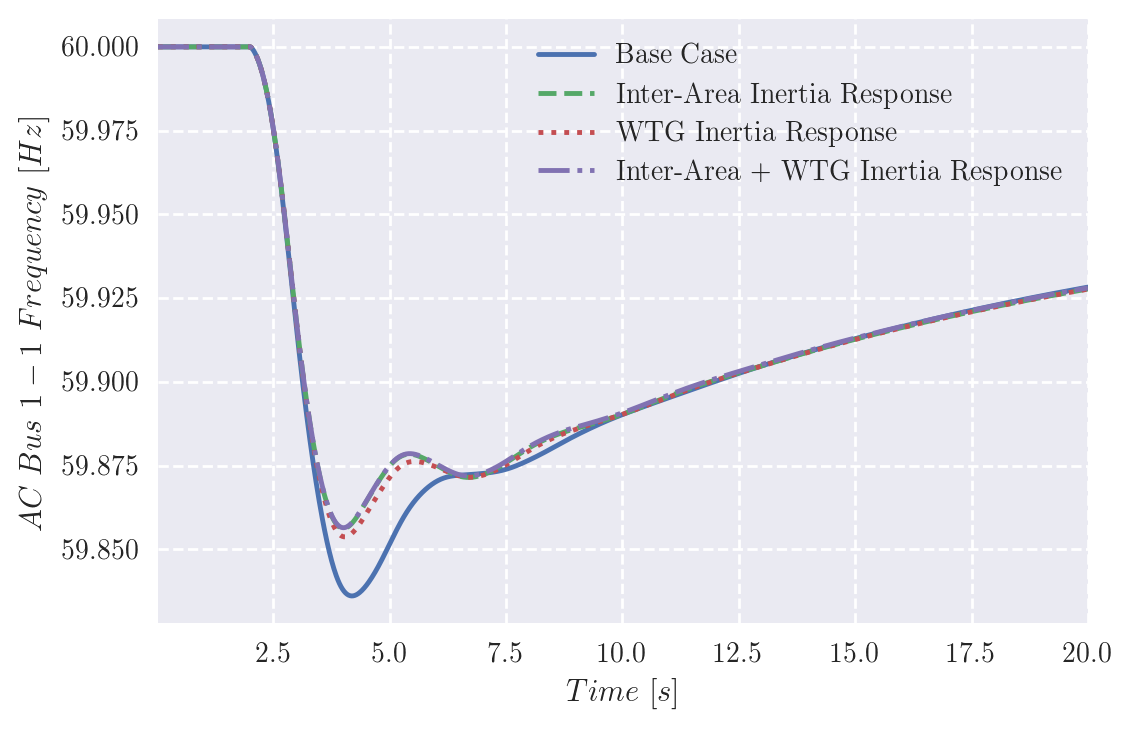

In [76]:
Freq1 = [10]
multi_case_plot(Freq1, ytimes=60,
                   ylabel='$AC\ Bus\ 1-1\ Frequency\ [Hz]$', 
                   savefig='pdf/area1_freq1.pdf')

(<matplotlib.figure.Figure at 0x7fe1204a3f60>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe11feb77f0>)

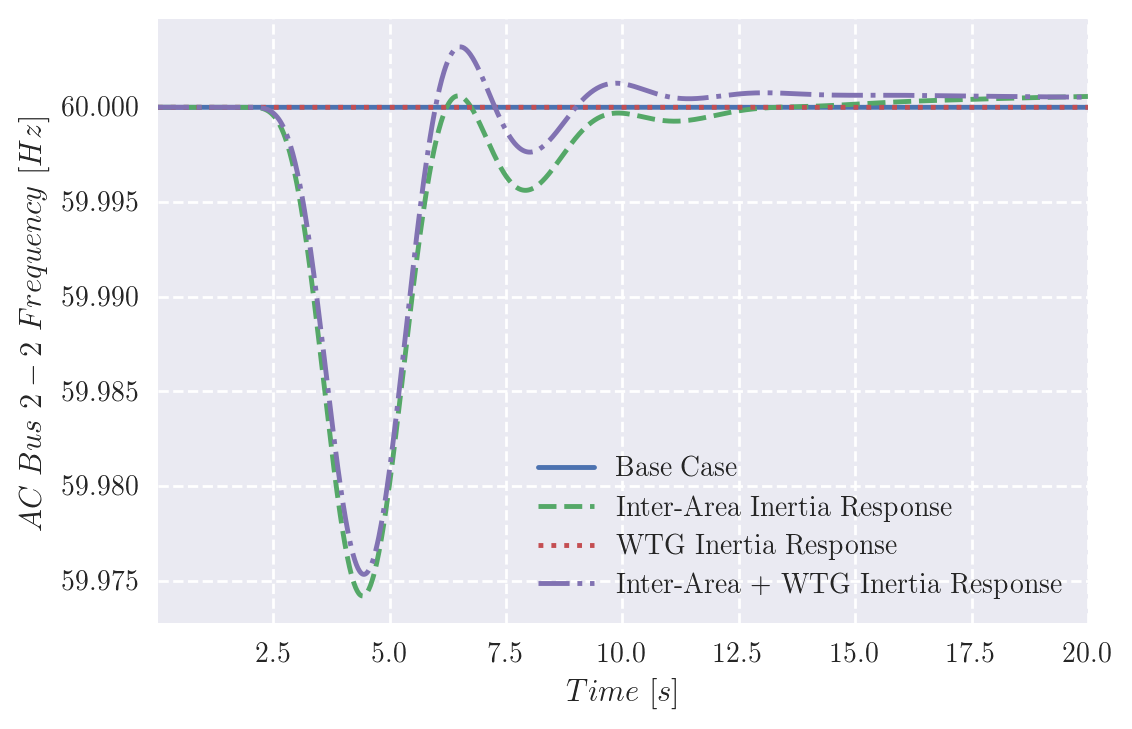

In [77]:
Freq2 = [55]
multi_case_plot(Freq2, ytimes=60,
                ylabel='$AC\ Bus\ 2-2\ Frequency\ [Hz]$',
                savefig='pdf/area1_freq2.pdf')

(<matplotlib.figure.Figure at 0x7fe12002a390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe11fd093c8>)

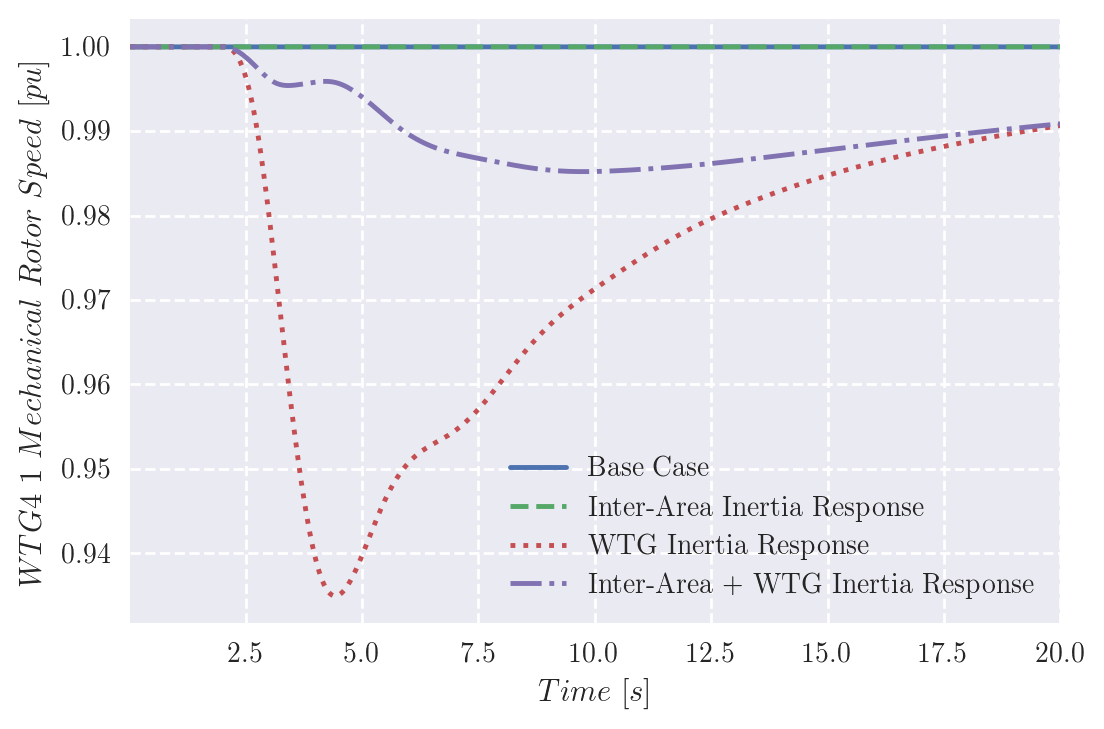

In [78]:
omega_m_1 = [206]
multi_case_plot(omega_m_1,
                   ylabel='$WTG4\ 1\ Mechanical\ Rotor\ Speed\ [pu]$', 
                   savefig='pdf/area1_omega_m_1.pdf')

(<matplotlib.figure.Figure at 0x7fe11fef4be0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe11fd36400>)

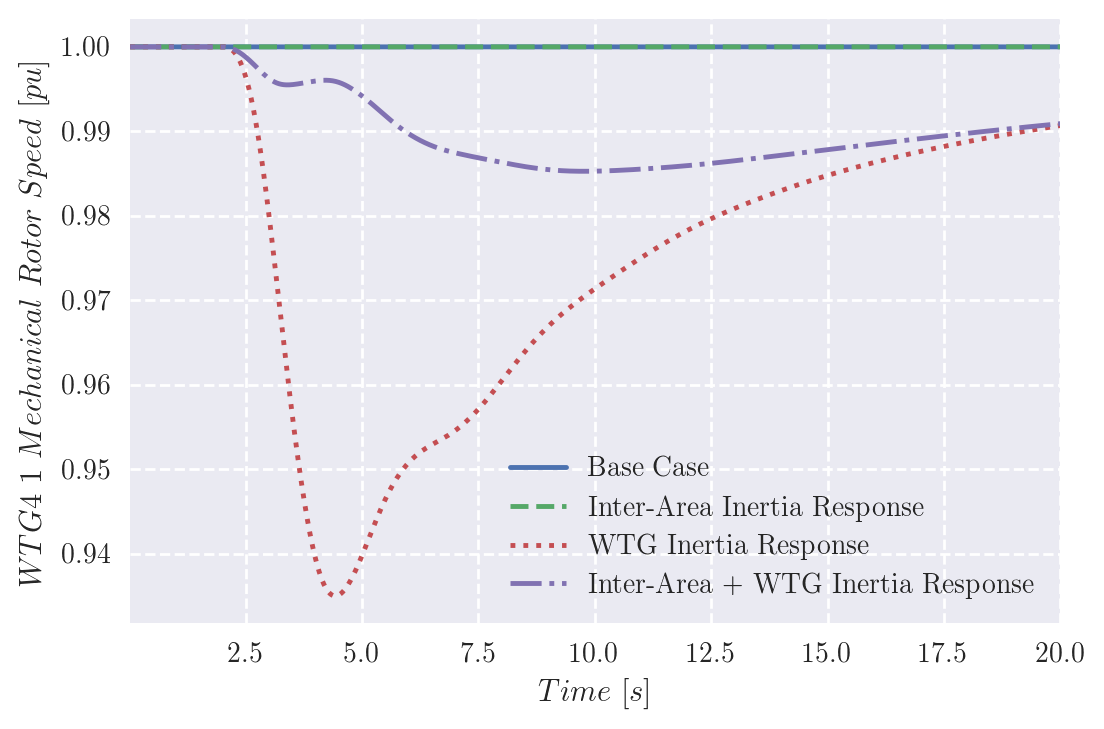

In [79]:
omega_m_2 = [209]
multi_case_plot(omega_m_2,
                   ylabel='$WTG4\ 1\ Mechanical\ Rotor\ Speed\ [pu]$', 
                   savefig='pdf/area1_omega_m_2.pdf')

(<matplotlib.figure.Figure at 0x7fe1202dd240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe11fb94908>)

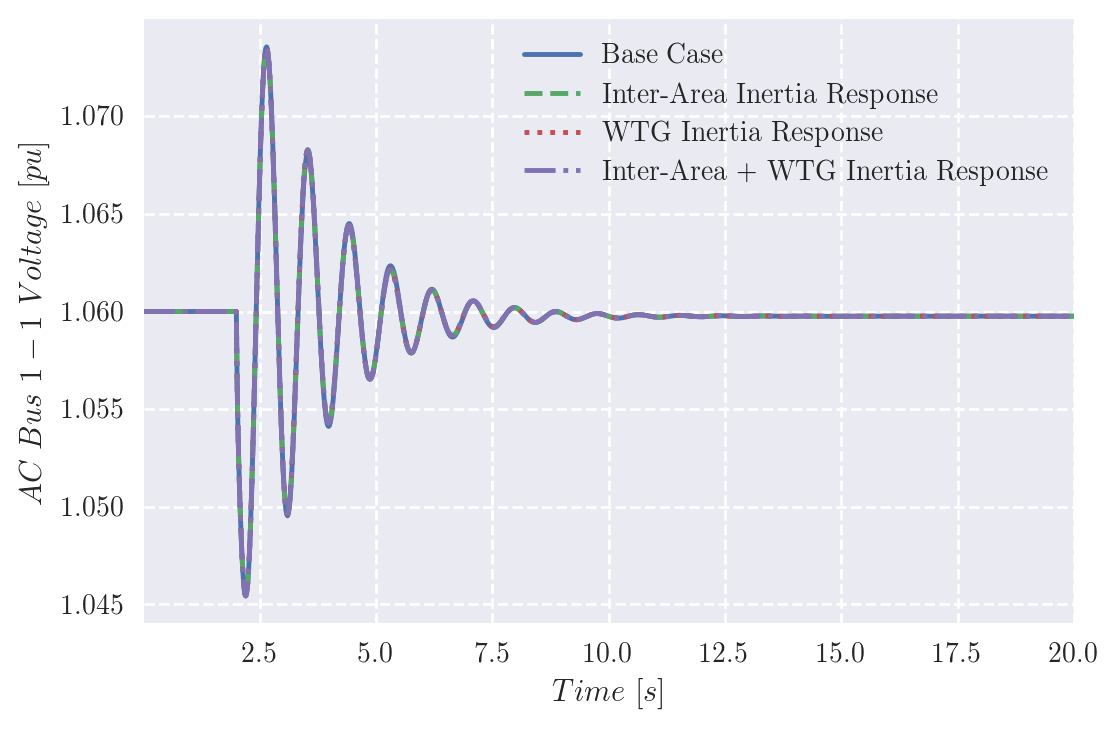

In [80]:
Vac1 = [260]
multi_case_plot(Vac1,
                ylabel='$AC\ Bus\ 1-1\ Voltage\ [pu]$', 
                savefig='pdf/area1_Vac1.pdf')

(<matplotlib.figure.Figure at 0x7fe11fe540f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe11fbb2208>)

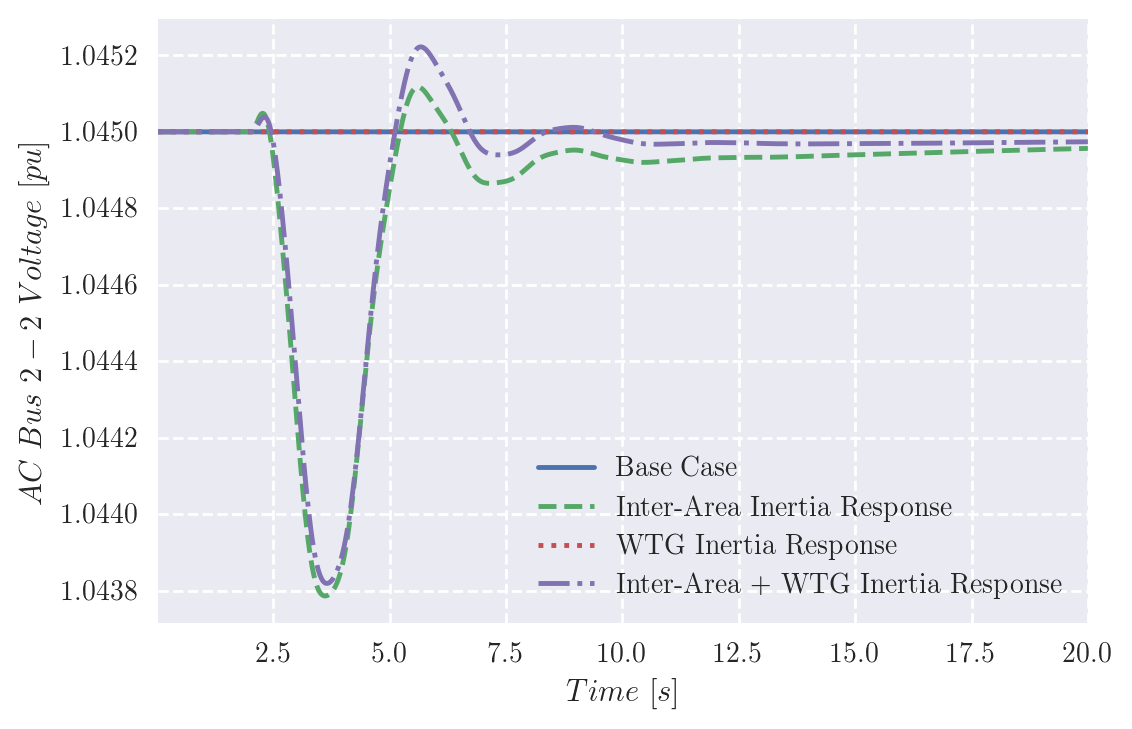

In [81]:
Vac2 = [275]
multi_case_plot(Vac2,
                   ylabel='$AC\ Bus\ 2-2\ Voltage\ [pu]$', 
                   savefig='pdf/area1_p_Vac2.pdf')